In [1]:
# library to open, manage, and plot data
import pandas as pd

---
# Import data

In [2]:
dataset = pd.read_csv('SP-280-Leste.csv', sep=',',header=None)
dataset.head()

,0,1,2,3
0,1,01/09/2011 00:00,37,89.0
1,2,01/09/2011 00:05,48,82.0
2,3,01/09/2011 00:10,26,85.0
3,4,01/09/2011 00:15,47,81.0
4,5,01/09/2011 00:20,52,82.0


## Clean and organize dataset

+ ### Organize the dataset

    Organize the columns, remove some not useful data, rename the columns and convert each column to your correct unit.

+ ### Date-time columns

    Working with date-time date requires to change the index DataFrame to the column that contain Date-Time values


In [3]:
'''Organize'''
# Drop the column '0'
dataset = dataset.drop(columns=0)

# Rename columns
dataset = dataset.rename(columns={0:"ID", 1:"Date-Time",2:"Flow[veh/h.lane]", 3:"Speed[km/h]" })

# Calculate the Flow rate
dataset["Flow[veh/h.lane]"] = dataset["Flow[veh/h.lane]"] * 60 / 5 / 2 # two lanes

# Calculate the Density
dataset["Density[veh/km.lane]"] = dataset["Flow[veh/h.lane]"] / dataset['Speed[km/h]']

# Convert to Datetime
dataset['Date-Time'] = pd.to_datetime(dataset['Date-Time'], format='%d/%m/%Y %H:%M')

'''Date-time column index'''
dataset.set_index('Date-Time',inplace=True)
dataset.head()

,Flow[veh/h.lane],Speed[km/h],Density[veh/km.lane]
Date-Time,,,
2011-09-01 00:00:00,222.0,89.0,2.494382
2011-09-01 00:05:00,288.0,82.0,3.512195
2011-09-01 00:10:00,156.0,85.0,1.835294
2011-09-01 00:15:00,282.0,81.0,3.481481
2011-09-01 00:20:00,312.0,82.0,3.804878


+ ### Missing values

    Verifying some missing values in dataset


In [4]:
dataset.isna().sum()

Flow[veh/h.lane]         0
Speed[km/h]              1
Density[veh/km.lane]    39
dtype: int64

In [5]:
dataset = dataset.fillna(0.0)
dataset.isna().sum()

Flow[veh/h.lane]        0
Speed[km/h]             0
Density[veh/km.lane]    0
dtype: int64

---
# Plotting

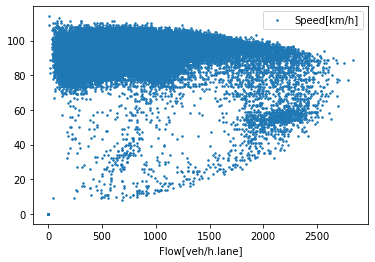

In [6]:
ax = dataset.plot(x='Flow[veh/h.lane]', y='Speed[km/h]', style='.', ms=3)
#fig = ax.get_figure()
#fig.savefig('SpeedFlow.png', dpi=300)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000254732F0EE0>,
      dtype=object)

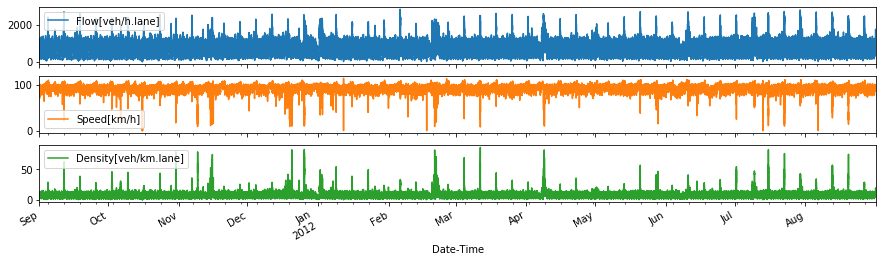

In [7]:
# Plot each variable in a different graph but all sharing the x axis
dataset.plot(subplots=True, figsize=(15,4))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025473A66EE0>,
      dtype=object)

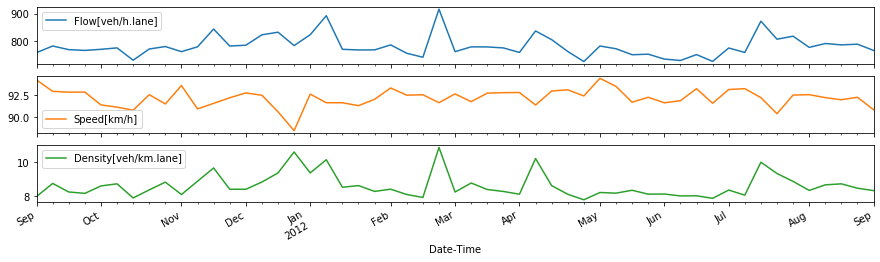

In [8]:
# Plotting aggregating data with 'resample' function
dataset.resample('W').mean().plot(subplots=True,figsize=(15,4))

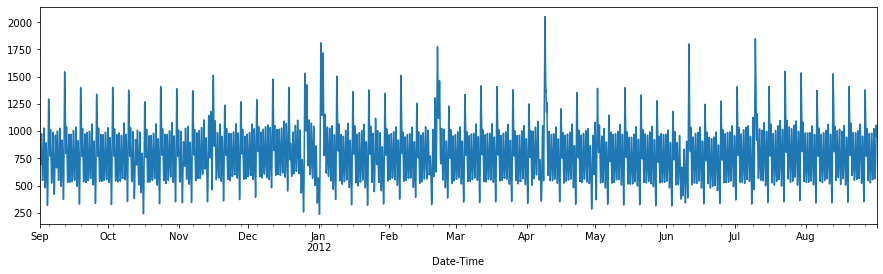

In [9]:
# Using a window 'rolling' by data - like a moving mean
dataset['Flow[veh/h.lane]'].rolling(24*7).mean().plot(figsize=(15,4))

---
# Wavelet

> Using the [PyWavelets](https://pywavelets.readthedocs.io/en/latest/) library

In [10]:
import pywt

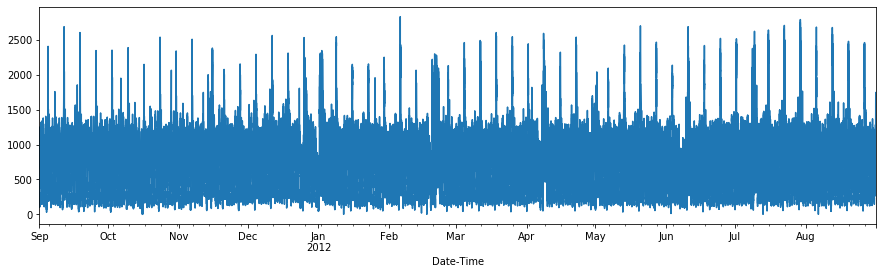

In [11]:
varName = 'Flow[veh/h.lane]'
#varName = 'Speed[km/h]'
#varName = 'Density[veh/km.lane]'

dataset[varName].plot(figsize=(15,4))

+ ## Discrete Wavelet Transform (DWT)

In [92]:
maxL = 4
wp = pywt.WaveletPacket(dataset[varName], 'haar', maxlevel=maxL)
wp

In [93]:
# Original data
wp.data

Date-Time
2011-09-01 00:00:00    222.0
2011-09-01 00:05:00    288.0
2011-09-01 00:10:00    156.0
2011-09-01 00:15:00    282.0
2011-09-01 00:20:00    312.0
                       ...  
2012-08-31 23:35:00    348.0
2012-08-31 23:40:00    378.0
2012-08-31 23:45:00    318.0
2012-08-31 23:50:00    360.0
2012-08-31 23:55:00    336.0
Name: Flow[veh/h.lane], Length: 105408, dtype: float64

In [100]:
# Print Aproximation and Detais in each level:
for idx in range(maxL):
    node = 'a' * idx
    print(wp[node].a)
    print(wp[node].d)
    print('==========')
    


a: [360.62445841 309.71277016 377.59502115 ... 500.63160108 492.14631971
 492.14631971]
d: [-46.66904756 -89.09545443  63.63961031 ...   8.48528137  42.42640687
  16.97056275]
aa: [474. 429. 309. ... 867. 732. 696.]
ad: [ 36. 105. -45. ... -33.  24.   0.]
aaa: [ 638.51742341  441.23463146  456.08387387 ... 1618.56742214 1344.91709782
 1009.74848353]
aad: [ 31.81980515  -4.24264069 -44.54772721 ... 167.58430714 118.79393924
  25.45584412]
None
None


In [37]:
# Inverse Transform
print(wp.reconstruct())

Date-Time
2011-09-01 00:00:00    222.0
2011-09-01 00:05:00    288.0
2011-09-01 00:10:00    156.0
2011-09-01 00:15:00    282.0
2011-09-01 00:20:00    312.0
                       ...  
2012-08-31 23:35:00    348.0
2012-08-31 23:40:00    378.0
2012-08-31 23:45:00    318.0
2012-08-31 23:50:00    360.0
2012-08-31 23:55:00    336.0
Name: Flow[veh/h.lane], Length: 105408, dtype: float64
